## This is a project on analyzing the scooter rental patterns to uncover trends and insights that drive smarter operations.

# Final Project Part
## Punyatoya Behera

## Import Python Libraries

In [ ]:
# Import appropriate libraries
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Data Loading

In [ ]:
# Load the csv file in the dataframe
df = pd.read_csv('https://raw.githubusercontent.com/codymbaldwin/sample-files/master/scooter_rentals.csv')

## Data Exploratory

In [ ]:
df.shape # checking the dimension od dataset

(731, 14)

In [ ]:
df.info() # checking the columns and their datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            731 non-null    int64  
 1   date          731 non-null    object 
 2   yr            731 non-null    int64  
 3   mnth          731 non-null    int64  
 4   weekday       731 non-null    int64  
 5   workday       731 non-null    int64  
 6   season        731 non-null    int64  
 7   holiday       731 non-null    int64  
 8   temp          731 non-null    float64
 9   atemp         731 non-null    float64
 10  hum           731 non-null    float64
 11  wind          731 non-null    float64
 12  unregistered  731 non-null    int64  
 13  registered    731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


In [ ]:
# renaming columns
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity_norm','temp':'temp_norm','atemp':'temp_felt_norm','wind':'wind_norm','registered':'rentals_registered','unregistered':'rentals_unregistered'},inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    731 non-null    int64  
 1   date                  731 non-null    object 
 2   year                  731 non-null    int64  
 3   month                 731 non-null    int64  
 4   weekday               731 non-null    int64  
 5   workday               731 non-null    int64  
 6   season                731 non-null    int64  
 7   holiday               731 non-null    int64  
 8   temp_norm             731 non-null    float64
 9   temp_felt_norm        731 non-null    float64
 10  humidity_norm         731 non-null    float64
 11  wind_norm             731 non-null    float64
 12  rentals_unregistered  731 non-null    int64  
 13  rentals_registered    731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


In [ ]:
# preview first 5 records
df.head(5)

,ID,date,year,month,weekday,workday,season,holiday,temp_norm,temp_felt_norm,humidity_norm,wind_norm,rentals_unregistered,rentals_registered
0,1,1/1/2011,0,1,6,0,1,0,0.344167,0.363625,0.805833,0.160446,331,654
1,2,1/2/2011,0,1,0,0,1,0,0.363478,0.353739,0.696087,0.248539,131,670
2,3,1/3/2011,0,1,1,1,1,0,0.196364,0.189405,0.437273,0.248309,120,1229
3,4,1/4/2011,0,1,2,1,1,0,0.200000,0.212122,0.590435,0.160296,108,1454
4,5,1/5/2011,0,1,3,1,1,0,0.226957,0.229270,0.436957,0.186900,82,1518


## Replace Data

In [ ]:
df['season'] = df['season'].replace([1,2,3,4],['winter','spring','summer','fall']) # replacing season column


## Create new column

In [ ]:
df['rentals_total'] = df['rentals_registered'] + df['rentals_unregistered'] # creating new column
df.head()

,ID,date,year,month,weekday,workday,season,holiday,temp_norm,temp_felt_norm,humidity_norm,wind_norm,rentals_unregistered,rentals_registered,rentals_total
0,1,1/1/2011,0,1,6,0,winter,0,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,0,1,0,0,winter,0,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,0,1,1,1,winter,0,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,0,1,2,1,winter,0,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,0,1,3,1,winter,0,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df.describe() # generate descriptive stats.

,ID,year,month,weekday,workday,holiday,temp_norm,temp_felt_norm,humidity_norm,wind_norm,rentals_unregistered,rentals_registered,rentals_total
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.500684,6.519836,2.997264,0.683995,0.028728,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.500342,3.451913,2.004787,0.465233,0.167155,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.000000,4.000000,1.000000,0.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,1.000000,7.000000,3.000000,1.000000,0.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,1.000000,10.000000,5.000000,1.000000,0.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,1.000000,12.000000,6.000000,1.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
df.isnull().sum() # checking for null values

,0
ID,0
date,0
year,0
month,0
weekday,0
workday,0
season,0
holiday,0
temp_norm,0
temp_felt_norm,0


## Generate graph

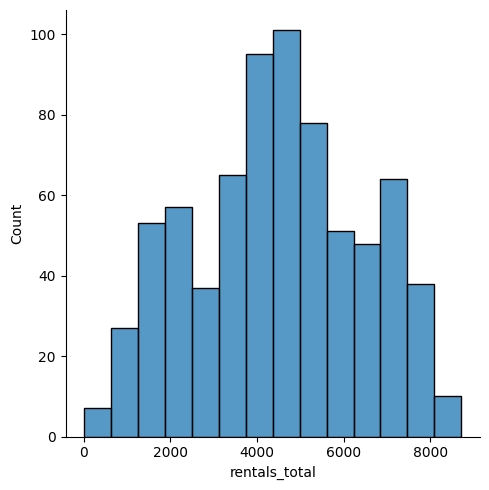

In [ ]:
# generate a histogram for "rentals_total" column
sns.displot(df,x = 'rentals_total');

## Generate scatterplot

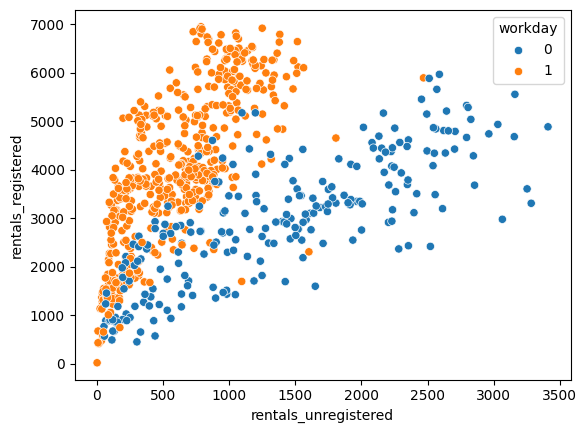

In [ ]:
# generate scatterplot
sns.scatterplot(x ='rentals_unregistered',y='rentals_registered',data=df,hue='workday');

## Generate swarmplot

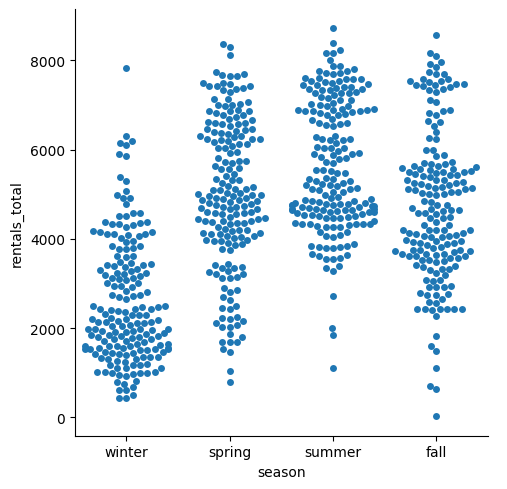

In [ ]:
# generate swarmplot
sns.catplot(data=df, x='season', y='rentals_total',kind='swarm')

## Generate lineplot

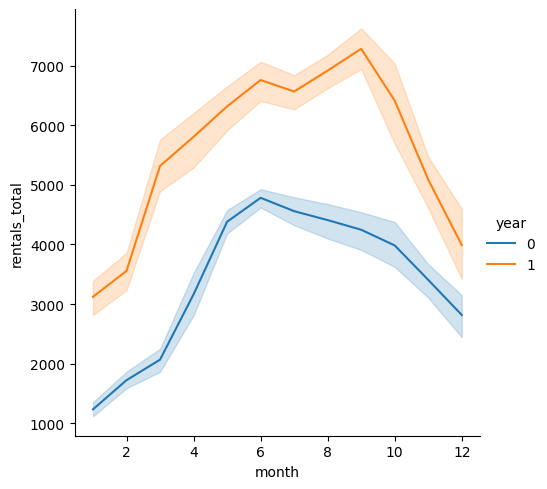

In [ ]:
# Generate lineplot
sns.relplot(data=df,x='month',y = 'rentals_total',kind ='line',hue='year');

## Generate Pairplot

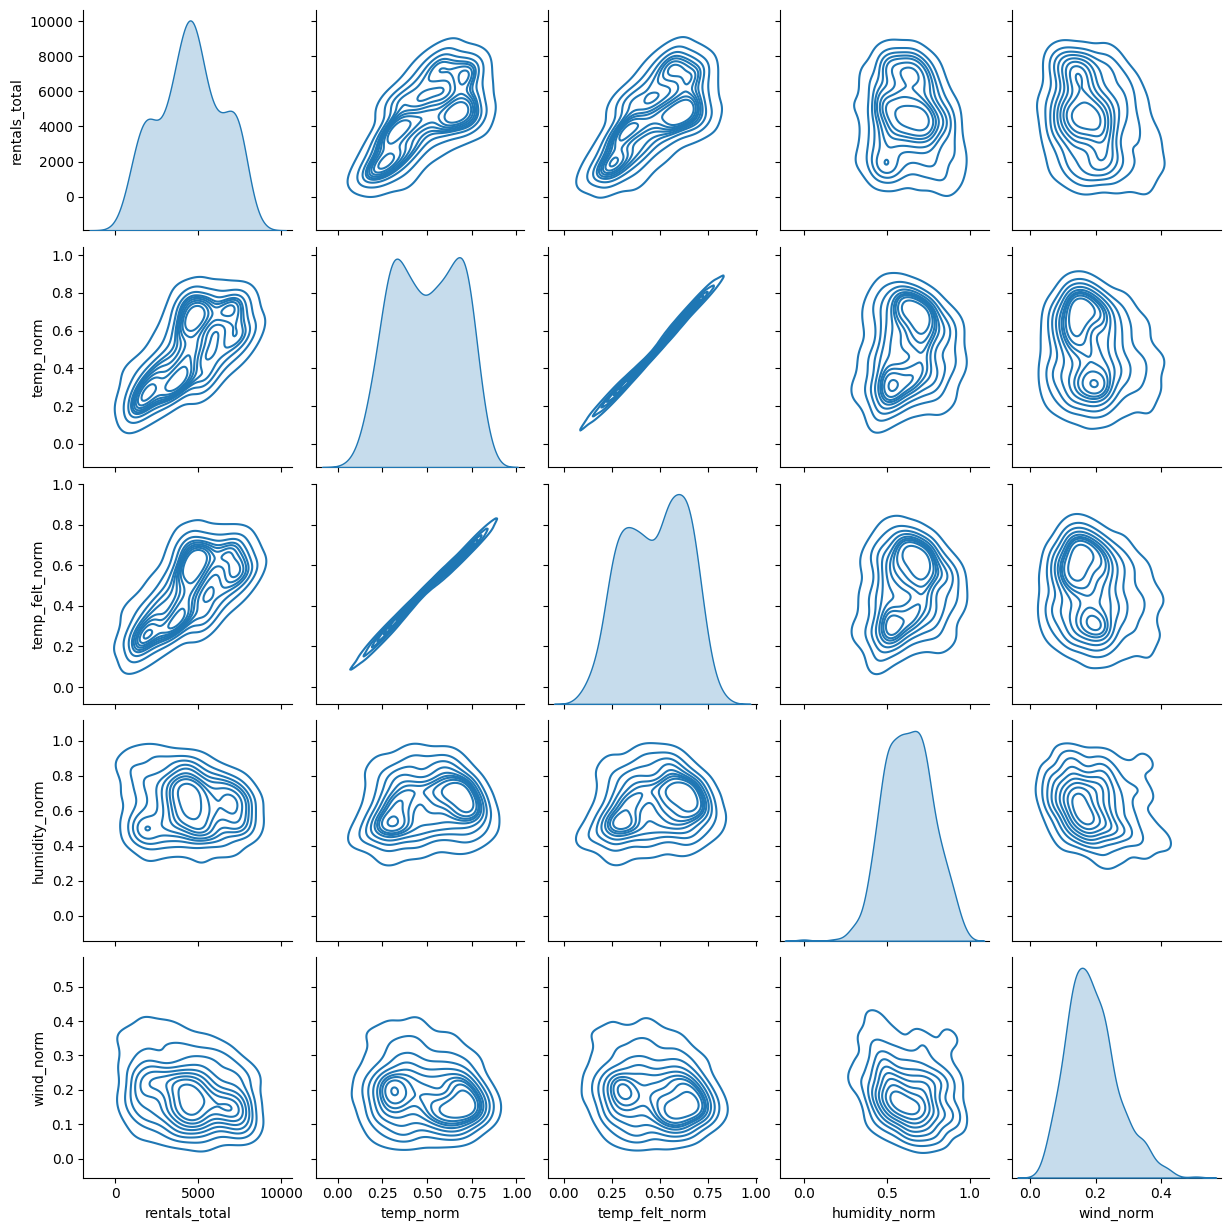

In [ ]:
# Generate pairplot
sns.pairplot(df.iloc[:,[14,8,9,10,11]],kind='kde');

## Generate heatmap

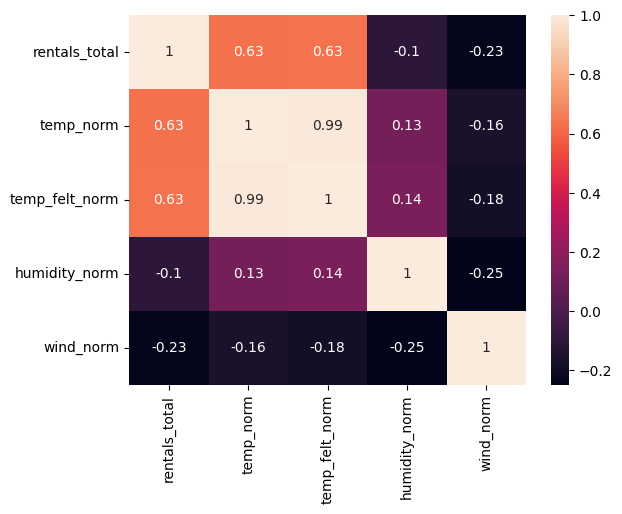

In [ ]:
# Generate a heatmap
corr=df.iloc[:,[14,8,9,10,11]].corr()
sns.heatmap(corr,annot=True);

## Model Preparation

In [ ]:
# separate dependent variable(y) from independent variable(x)
X = df[['temp_norm']]
y = df['rentals_total']

In [ ]:
# split data into train_test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# train prediction model using training data
model = LinearRegression()
model.fit(X_train.values, y_train)

LinearRegression()

In [ ]:
# find intercept and coefficient values
# y = b + mx
print(model.intercept_)
print(model.coef_)

1327.930810368468
[6463.96764523]


In [ ]:
# predict total rentals for a specific scenario
new_X = [[0.30]]
model.predict(new_X)

array([3267.12110394])

In [ ]:
# make prediction in the test data
y_pred = model.predict(X_test.values)

In [ ]:
# evaluate performance of the model
metrics.r2_score(y_test, y_pred)

0.37540464616240443